In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Exploratory data analysis, visulazation, machine learning 

In [2]:
# seaborn is data visualization library for using matplot easily. 

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn') # scheme setting
sns.set(font_scale=2.5)

# missingno is visualization library for missing value
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

# show graph inline
%matplotlib inline

## What we gonna do
1. checking data set
    - null data checking
2. exploratory data analysis
    - analyzing feature & check inter relationship btw data
    - get insight from various visuals
3. feature engineering
    - to enhance model's performance
    - one-hot encoding, classification, intervalization, text data processing
4. building model
    - sklearn model
    - ml model
5. model trainign and prediction
    - trainset
    - test set -> prediction
6. model evaluation
    - prediction performance

## 1. checking data set
- pandas library

In [3]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [4]:
df_train.head()
# target = survived
# feature = [Pclass, Age, SibSp, Parch, Fare]
# Pclass: class of ticket
# SibSp: 함께 탑승한 형제, 배우자의 수
# parch: 함께 탑승한 부모, 아이의 수

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df_train.describe()
# id는 891개, age는 714 -> 결측치 존재

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_test.describe()
# age, fare 결측

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### 1.1 Null data check
- visualize null value

In [7]:
for col in df_train.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [8]:
for col in df_test.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test[col].shape[0]))
    print(msg)
# both train and test set have about 20% of missing "age" value

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


<AxesSubplot:>

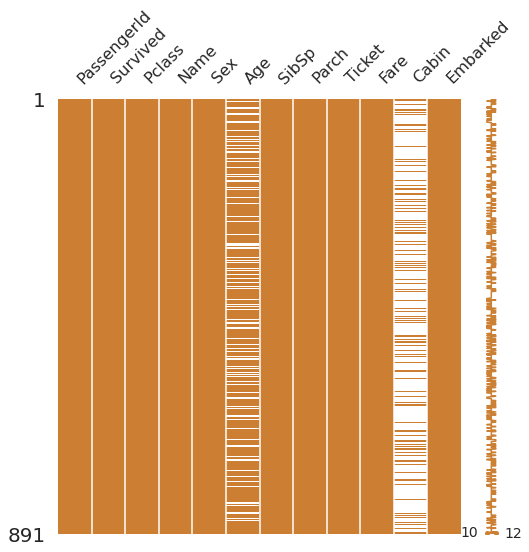

In [9]:
msno.matrix(df=df_train.iloc[:,:], figsize=(8,8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

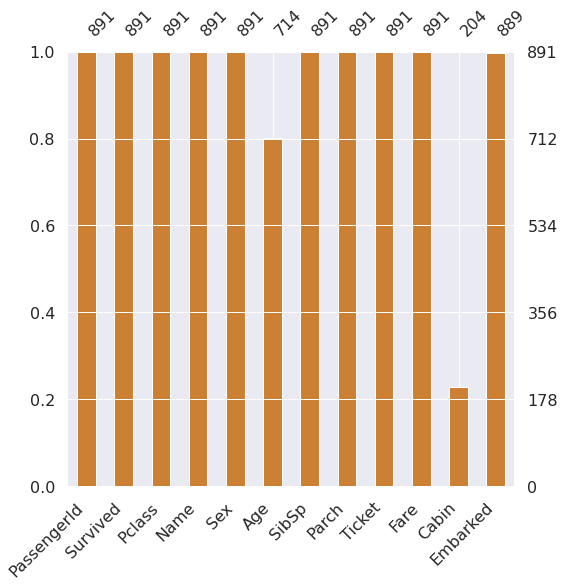

In [10]:
msno.bar(df=df_train.iloc[:,:], figsize=(8,8), color = (0.8, 0.5, 0.2))

<AxesSubplot:>

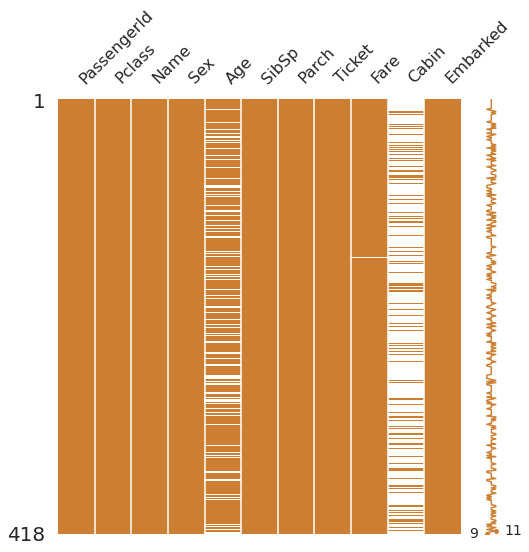

In [11]:
msno.matrix(df=df_test.iloc[:,:], figsize=(8,8), color = (0.8, 0.5, 0.2))

### 1.2 Target label checking
- checking **distribution** of target label
- binary classificatoin -> 0 and 1 's distribution can make evalution different

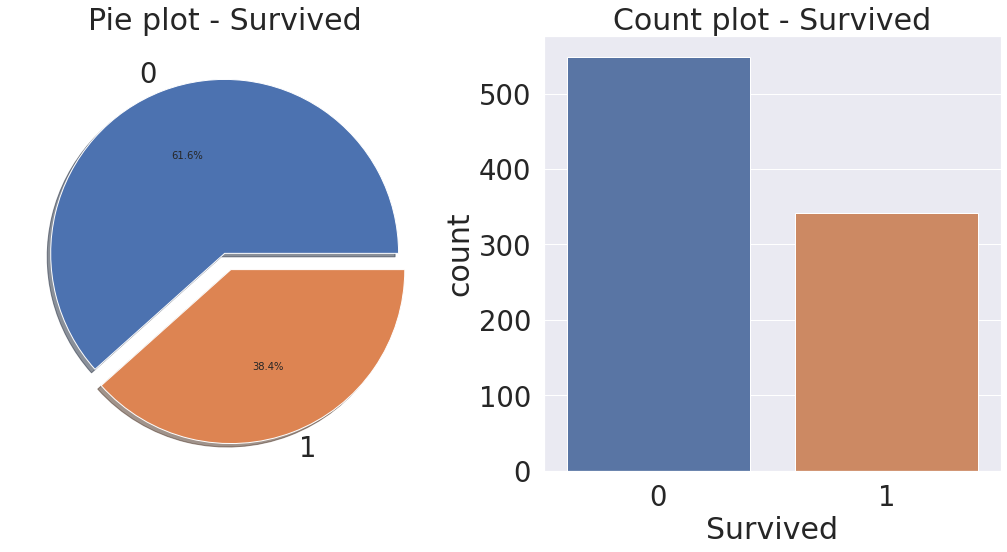

In [12]:
# plt.subplots shows multiple graphs at the same time
#
f, ax = plt.subplots(1,2, figsize=(18,8)) # 1row, 2 col
# f is plot, ax is position of the axes

df_train['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True) # explode = radius, distance
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')

sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

- 38.4% is survived
- about balanced

## 2. Exploratory data analysis
- data analyzing 
- visualization

### 2.1 Pclass
- ordinal data (number, category, order)
- survived probabilty per Pclass

In [13]:
# numpy count()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count() 
# how many people in each class

,Survived
Pclass,
1,216
2,184
3,491


In [14]:
# numpy sum()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).sum()
# how many survived people in each class

,Survived
Pclass,
1,136
2,87
3,119


In [15]:
# pandas crosstab()
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

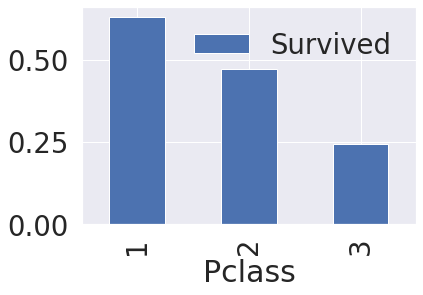

In [16]:
# numpy mean()
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()
# survived prob of each class

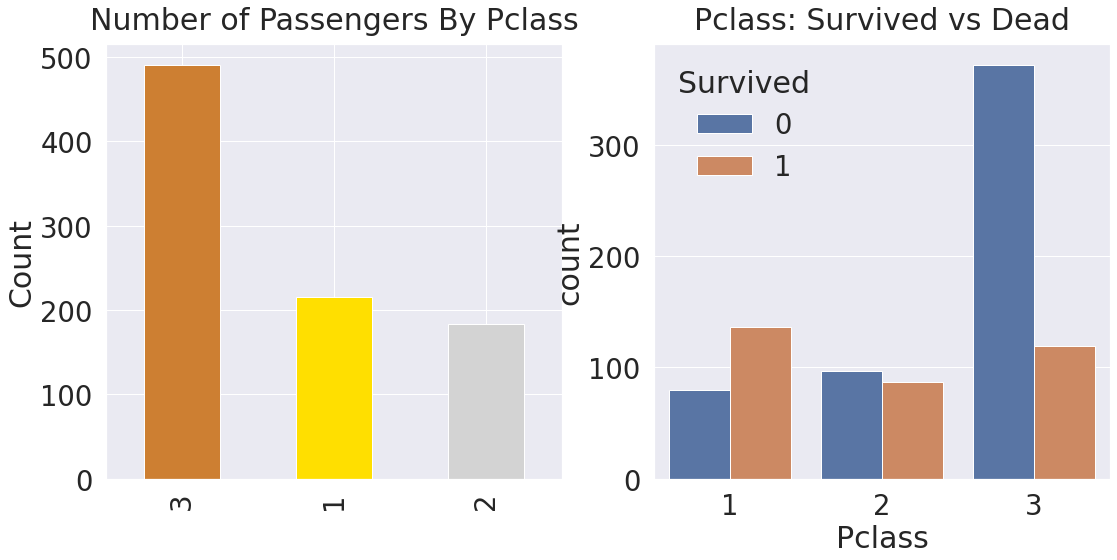

In [17]:
# seaborn countplot()
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18,8))

df_train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()
# as class higher, survived prob gets higher
# 'Pclass' will be useful.

### 2.2 Sex

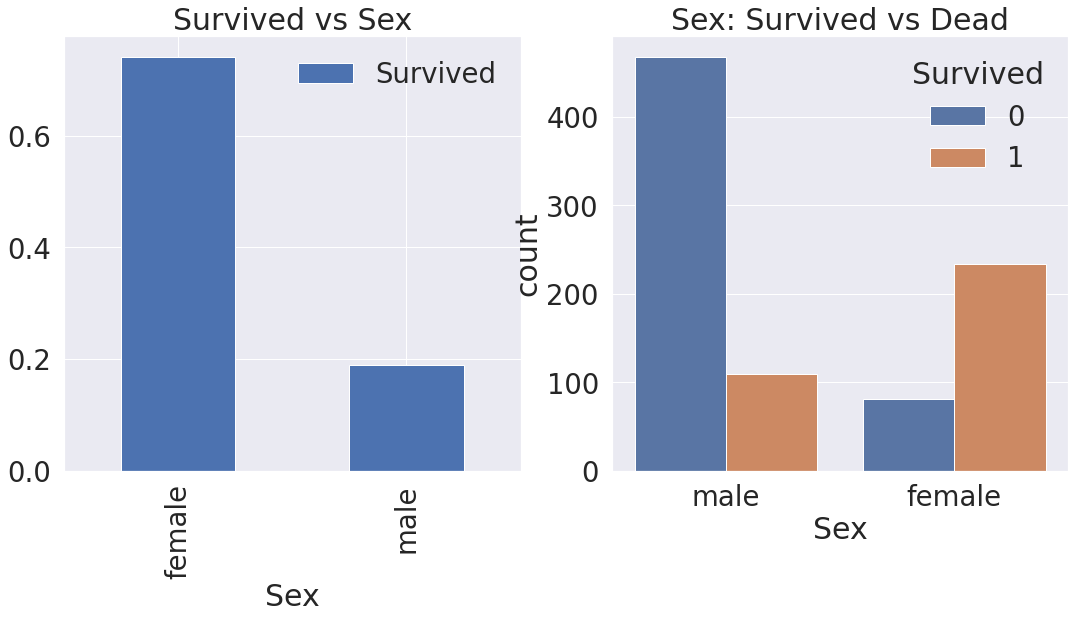

In [18]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [19]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [20]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


- 'Sex' will be useful

### 2.3 Both Sex and Pclass

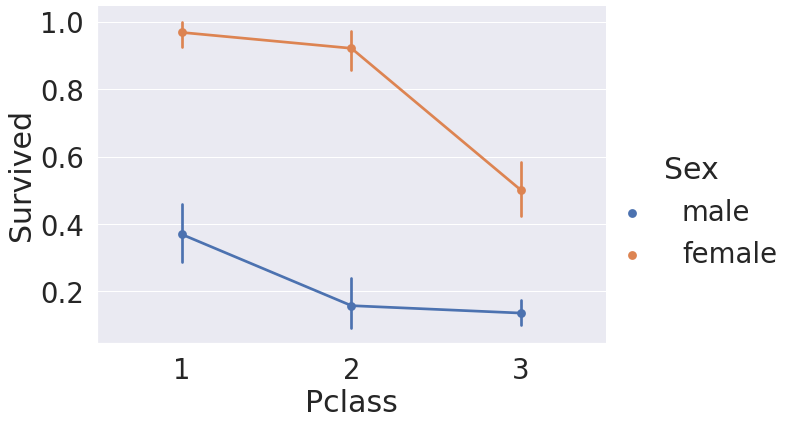

In [21]:
# seaborn factorplot() -> 3 dimension graph
sns.factorplot('Pclass', 'Survived', hue='Sex', data=df_train, size=6, aspect=1.5)
# female survived more in every class
# not depends on sex, class affect the survive

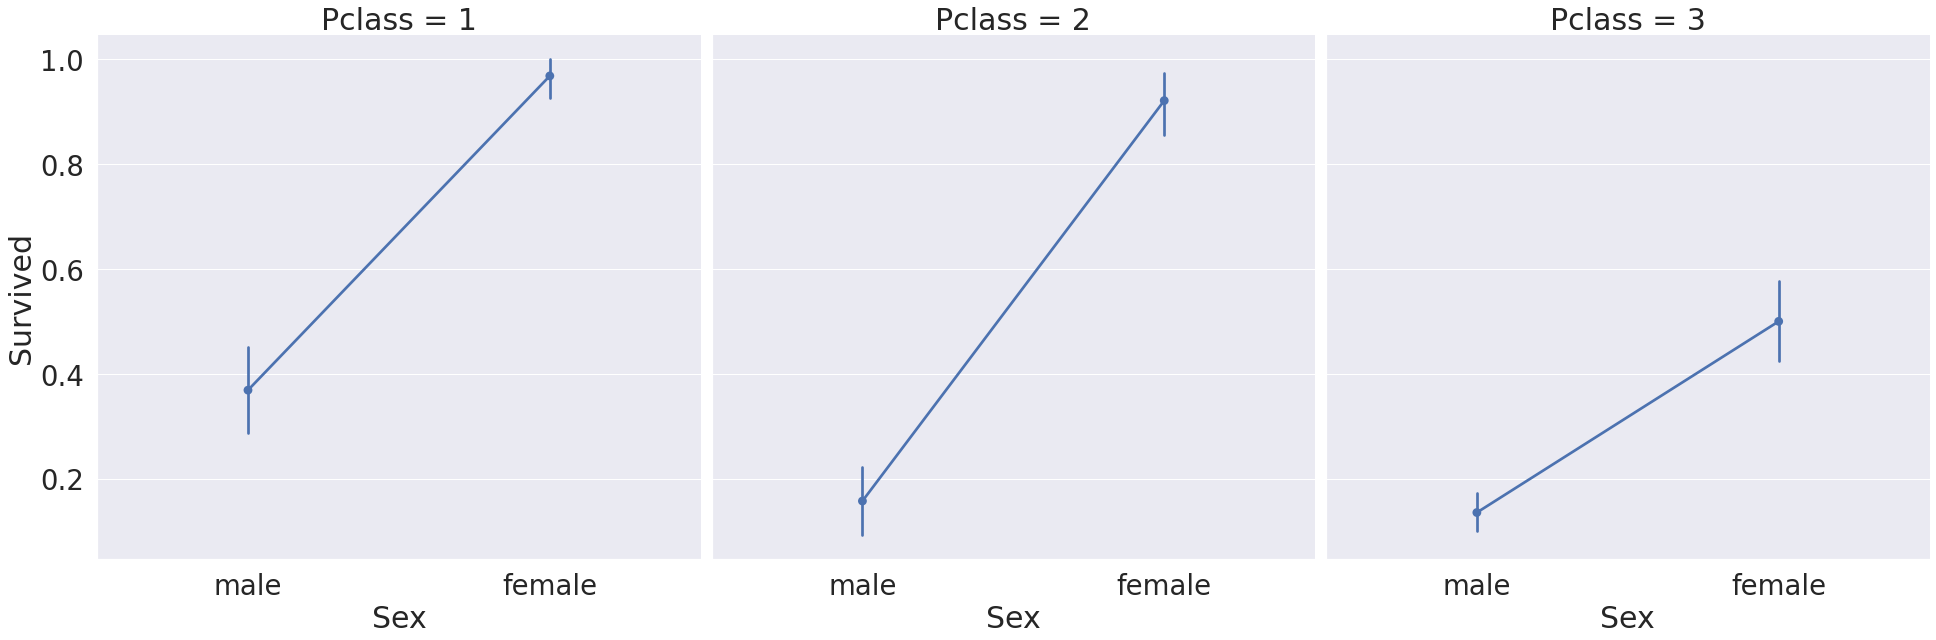

In [22]:
sns.factorplot(x='Sex', y='Survived', col='Pclass', data=df_train, satureation=.5, size=9, aspect=1)

### 2.4 Age

In [23]:
print('oldest: {:.1f} Years'.format(df_train['Age'].max()))
print('youngest: {:.1f} Years'.format(df_train['Age'].min()))
print('average: {:.1f} Years'.format(df_train['Age'].mean()))

oldest: 80.0 Years
youngest: 0.4 Years
average: 29.7 Years


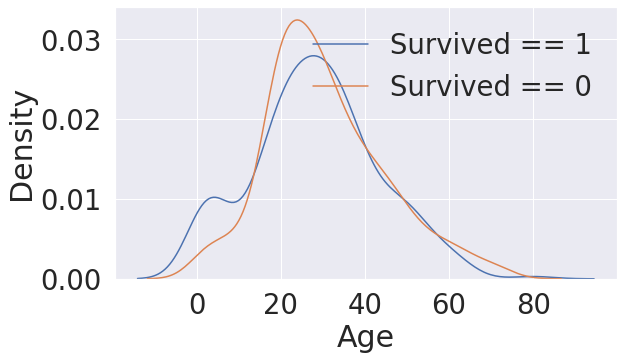

In [24]:
# age hitogram
fig, ax = plt.subplots(1,1,figsize=(9,5))

# kde = Kernel Density Estimation
# kernel function =>  원점을 중심으로 대칭이면서 적분값이 1인 non-negative 함수 (Gaussian...)
# kernel function 이용해서 histogram을 smooth 하게
# x를 기준으로, d라는 거리 이내에 몇개의 점이 있는가...?
sns.kdeplot(df_train[df_train['Survived']==1]['Age'], ax=ax)
sns.kdeplot(df_train[df_train['Survived']==0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])
plt.show()
# 0~20 have survived more

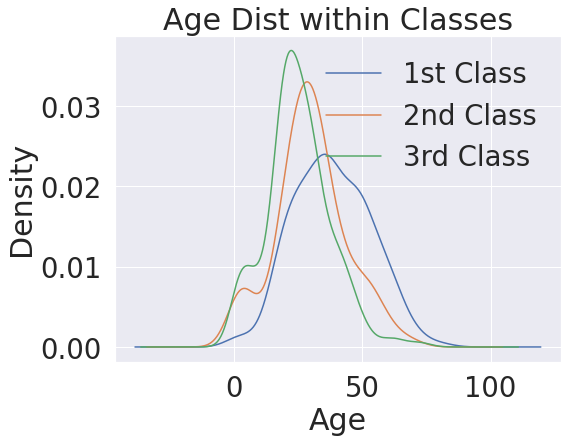

In [25]:
# age dist for each class
plt.figure(figsize=(8,6))
df_train['Age'][df_train['Pclass'] == 1].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 2].plot(kind='kde')
df_train['Age'][df_train['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Dist within Classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

# class가 높아질 수록, 나이많은 사람 많아짐

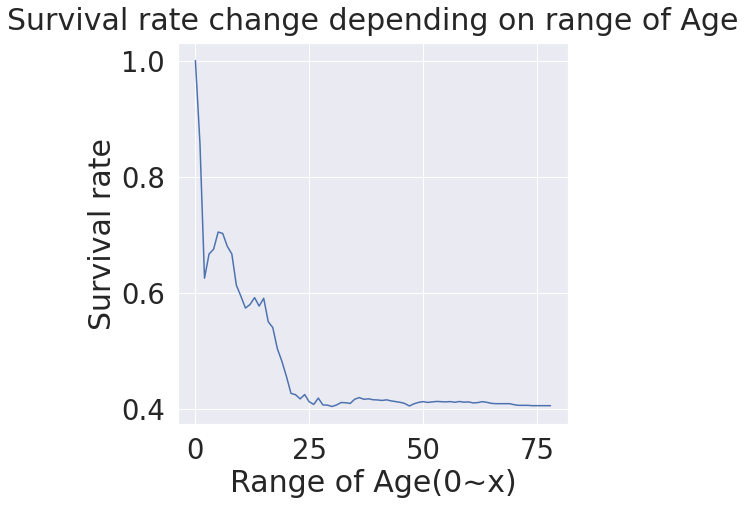

In [26]:
cummulate_survival_ratio = []
for i in range(1, 80):
    cummulate_survival_ratio.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))
    
plt.figure(figsize=(7,7))
plt.plot(cummulate_survival_ratio)
plt.title('Survival rate change depending on range of Age', y=1.02)
plt.ylabel('Survival rate')
plt.xlabel('Range of Age(0~x)')
plt.show()
# 나이가 올라갈 수록, 살 확률 줄어듦
# kde보다, cummulate가 경향을 잘 나타내나...? ...?

### Pcalss, Sex, Age

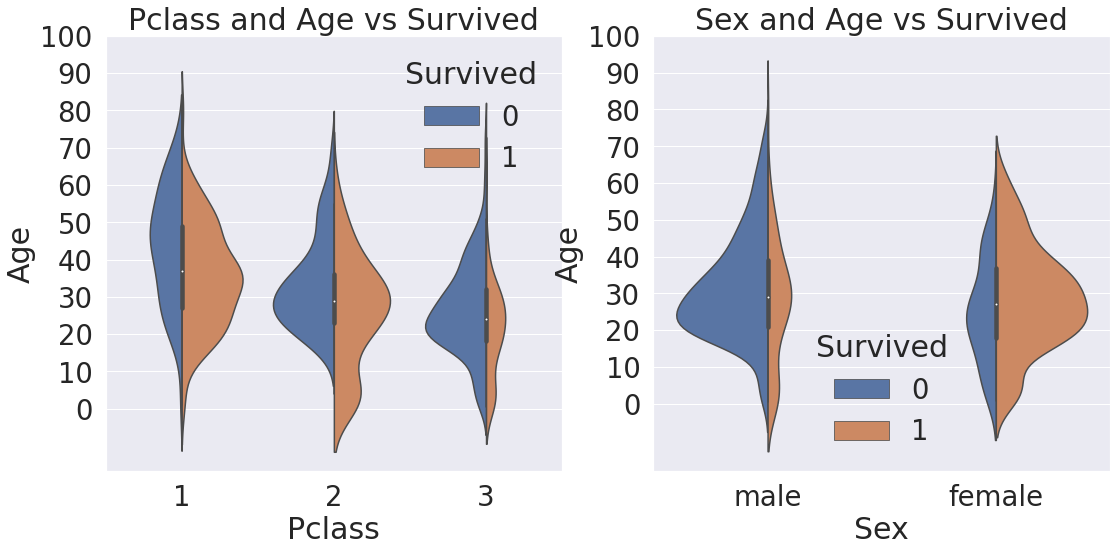

In [27]:
# seaborn violinplot()
# boxplot과 비슷한 목적인데, kde를 이용함 

f, ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot("Pclass", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[0]) # split 해서 Survived 0,1이 붙어나옴
ax[0].set_title("Pclass and Age vs Survived")
ax[0].set_yticks(range(0,110,10))

sns.violinplot("Sex", "Age", hue="Survived", data=df_train, scale='count', split=True, ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

### Embarked
- 탑승한 항구

<AxesSubplot:xlabel='Embarked'>

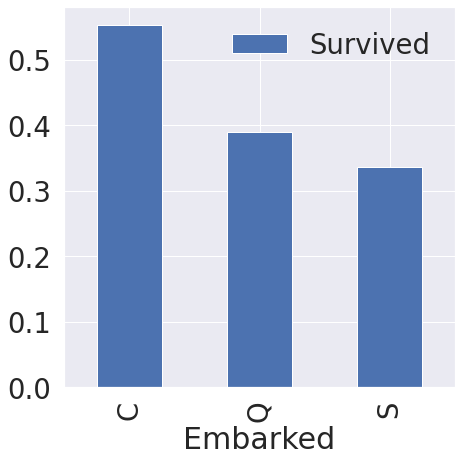

In [28]:
f, ax = plt.subplots(1, 1, figsize=(7,7))
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax)

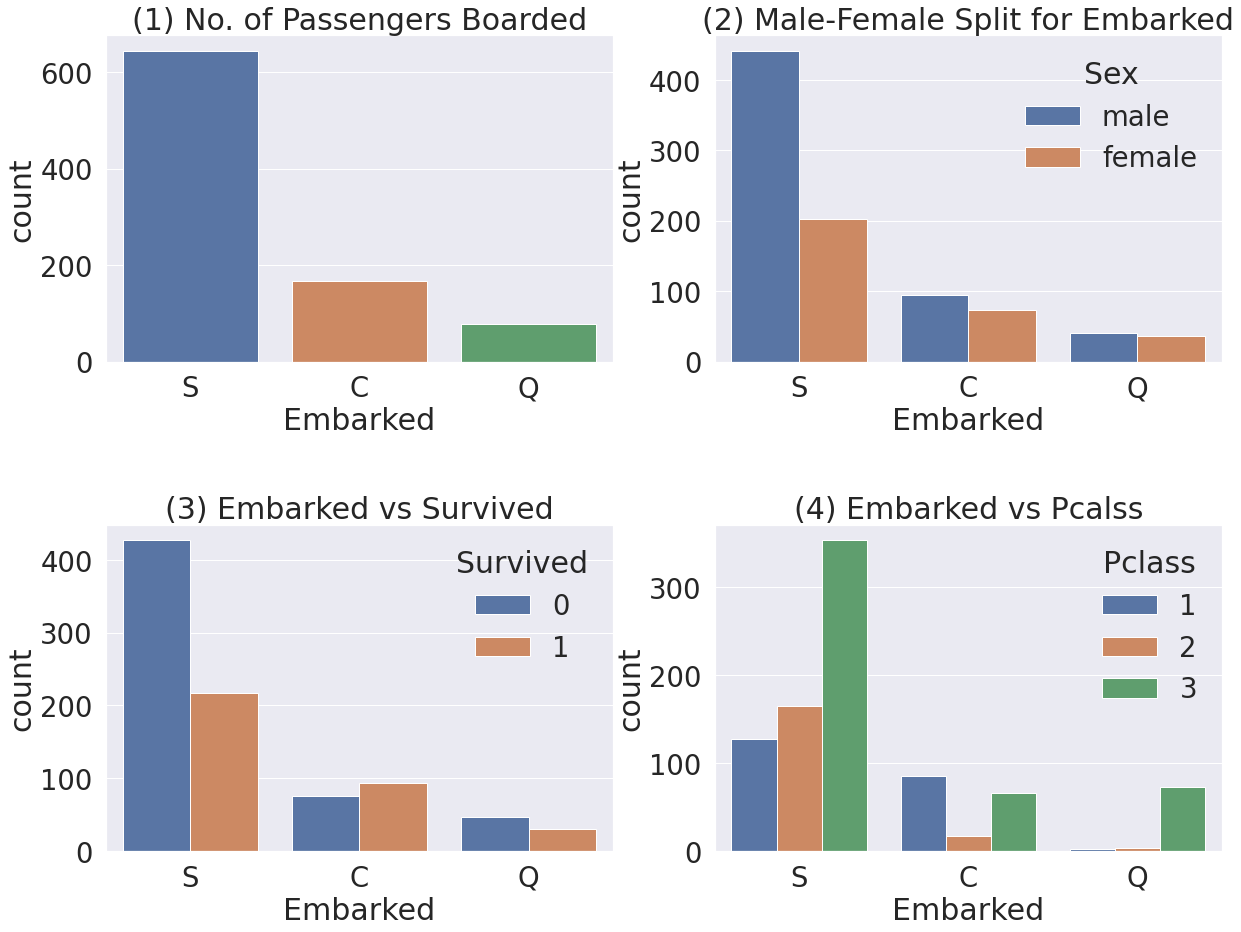

In [29]:
f, ax = plt.subplots(2,2, figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax=ax[0,0])
ax[0,0].set_title('(1) No. of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=df_train, ax=ax[0,1])
ax[0,1].set_title('(2) Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Survived', data=df_train, ax=ax[1,0])
ax[1,0].set_title('(3) Embarked vs Survived')

sns.countplot('Embarked', hue='Pclass', data=df_train, ax=ax[1,1])
ax[1,1].set_title('(4) Embarked vs Pcalss')
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

# c에서 탄 사람이 많이 살아 남았는데, 거기에 1class 사람이 많음

### 2.7 Family: SibSp + Parch

In [30]:
# merge them to family
df_train['FamilySize'] = df_train['SibSp'] + df_train['Parch'] + 1 # include oneself
df_test['FamilySize'] = df_test['SibSp'] + df_test['Parch'] + 1

print('Max size of family: ', df_train['FamilySize'].max())
print('Min size of family: ', df_train['FamilySize'].min())

Max size of family:  11
Min size of family:  1


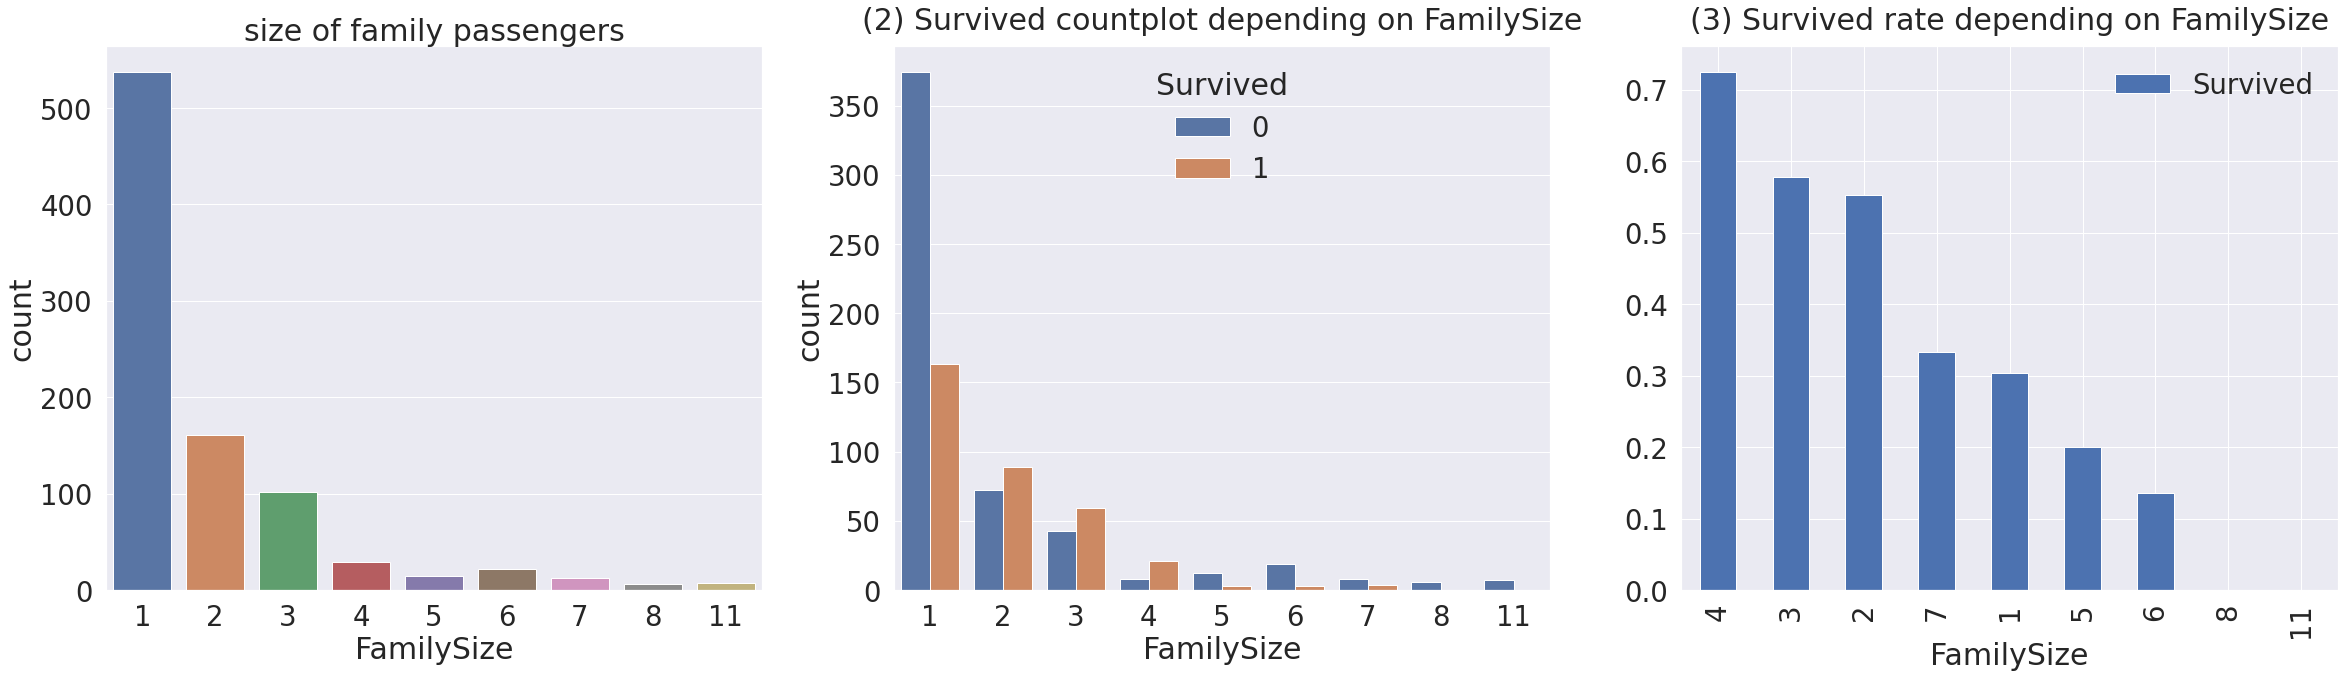

In [31]:
f, ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data=df_train, ax=ax[0])
ax[0].set_title('size of family passengers')

sns.countplot('FamilySize', hue='Survived', data=df_train, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize', y=1.02)

df_train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize', y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

### 2.8 Fare
- continuous feature

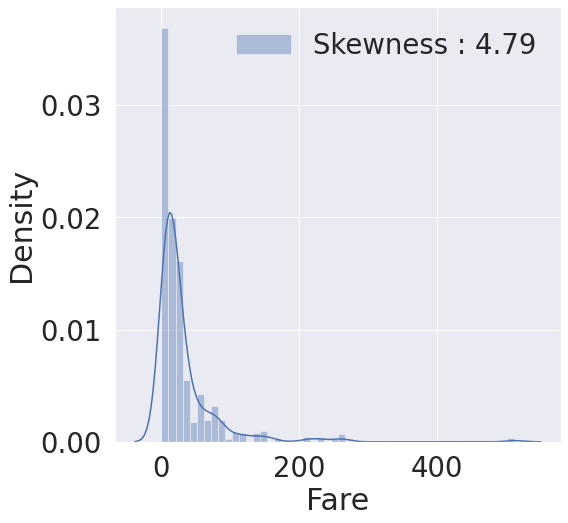

In [32]:
# seaborn distplot()
# histogram + kde
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
# 매우 편향됨 
# outlier에게 크게 영향 받을 수 있음 -> log 취함

In [33]:
df_test.loc[df_test.Fare.isnull(), 'Fare'] = df_test['Fare'].mean() # test set에 null 1개 있던거 채우기

# pandas map() -> 그 데이터에 람다식 적용
df_train['Fare'] = df_train['Fare'].map(lambda i: np.log(i) if i>0 else 0) # 음수는 나오지 않도록,,, 
df_test['Fare'] = df_test['Fare'].map(lambda i: np.log(i) if i>0 else 0)

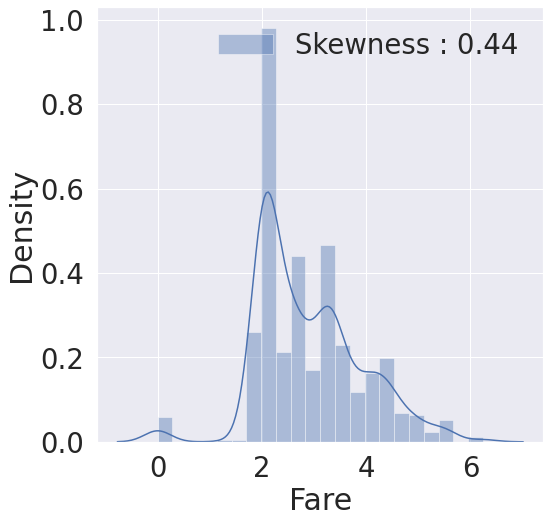

In [34]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
g = sns.distplot(df_train['Fare'], color='b', label='Skewness : {:.2f}'.format(df_train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')
# 편향 많이 줄어듦

### 2.9 Cabin
- NaN이 80%
- 데이터 버림

### 2.10 Ticket
- String data
- 전처리 방법 생각해 보아야 함

In [35]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

## 3. Feature Engineering
### 3.1. Fill Null
- Fill Null in Age using title
    - Age는 null data가 177 개
    - title + statistics 이용
    - title: Miss, Mr, Mrs

In [36]:
# extract 이용해서 series의 특정 부분 추출
df_train['Initial'] = df_train.Name.str.extract('([A-Za-z]+)\.') # '문자.' 인 것 추출
df_test['Initial'] = df_test.Name.str.extract('([A-Za-z]+)\.')

In [37]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [38]:
# 위의 표에서 성별 보고 miss, mrs, mr, other로 치환
df_train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)
df_test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [39]:
df_train.groupby('Initial').mean() 
# miss, mrs의 survied 가 높음

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


<AxesSubplot:xlabel='Initial'>

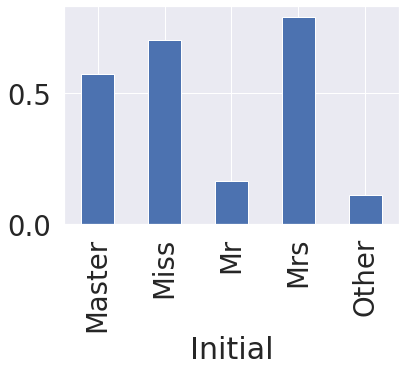

In [40]:
df_train.groupby('Initial')['Survived'].mean().plot.bar()

- train 데이터의 statistics를 이용해 null data 채움
- test 데이터는 언제나 unseen 상태여야 함

In [41]:
df_train.groupby('Initial').mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,3.340710,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,3.123713,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,2.651507,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,3.443751,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,2.641605,1.222222


In [42]:
# initial 별 age 평균을 이용해 null 채우기
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mr'), 'Age'] = 33
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Mrs'), 'Age'] = 36
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Master'),'Age'] = 5
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Miss'), 'Age'] = 22
df_train.loc[(df_train.Age.isnull())&(df_train.Initial=='Other'), 'Age'] = 46

df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mr'), 'Age'] = 33
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Mrs'), 'Age'] = 36
df_test.loc[(df_train.Age.isnull())&(df_test.Initial=='Master'),'Age'] = 5
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Miss'), 'Age'] = 22
df_test.loc[(df_test.Age.isnull())&(df_test.Initial=='Other'), 'Age'] = 46

**Fill Null in Embarekd**

In [43]:
print('Embarked has ', sum(df_train['Embarked'].isnull()), ' Null values')

Embarked has  2  Null values


In [44]:
# 2개만 비었고, 가장 많은게 'S'이니, S로 채우기.
df_train['Embarked'].fillna('S', inplace=True)

### 3.2 Change Age (continuous to categorical)
- Age는 현재 continuous feature
- group화 해서 category화
- loss가 생긴다는 단점

In [45]:
df_train['Age_cat'] = 0
df_train.loc[df_train['Age'] < 10, 'Age_cat'] = 0
df_train.loc[(10 <= df_train['Age'])&(df_train['Age'] < 20), 'Age_cat'] = 1
df_train.loc[(20 <= df_train['Age'])&(df_train['Age'] < 30), 'Age_cat'] = 2
df_train.loc[(30 <= df_train['Age'])&(df_train['Age'] < 40), 'Age_cat'] = 3
df_train.loc[(40 <= df_train['Age'])&(df_train['Age'] < 50), 'Age_cat'] = 4
df_train.loc[(50 <= df_train['Age'])&(df_train['Age'] < 60), 'Age_cat'] = 5
df_train.loc[(60 <= df_train['Age'])&(df_train['Age'] < 70), 'Age_cat'] = 6
df_train.loc[70 <= df_train['Age'], 'Age_cat'] = 7

df_test['Age_cat'] = 0
df_test.loc[df_test['Age'] < 10, 'Age_cat'] = 0
df_test.loc[(10 <= df_test['Age'])&(df_test['Age'] < 20), 'Age_cat'] = 1
df_test.loc[(20 <= df_test['Age'])&(df_test['Age'] < 30), 'Age_cat'] = 2
df_test.loc[(30 <= df_test['Age'])&(df_test['Age'] < 40), 'Age_cat'] = 3
df_test.loc[(40 <= df_test['Age'])&(df_test['Age'] < 50), 'Age_cat'] = 4
df_test.loc[(50 <= df_test['Age'])&(df_test['Age'] < 60), 'Age_cat'] = 5
df_test.loc[(60 <= df_test['Age'])&(df_test['Age'] < 70), 'Age_cat'] = 6
df_test.loc[70 <= df_test['Age'], 'Age_cat'] = 7

In [46]:
# 함수 만들어서 apply 하는 방법
def category_age(x):
    if x < 10:
        return 0
    elif x < 20:
        return 1
    elif x < 30:
        return 2
    elif x < 40:
        return 3
    elif x < 50:
        return 4
    elif x < 60:
        return 5
    elif x < 70:
        return 6
    else:
        return 7

df_train['Age_cat_2'] = df_train['Age'].apply(category_age)

In [47]:
print('두 방법이 같은 결과를 내는가: ', (df_train['Age_cat'] == df_train['Age_cat_2']).all())

두 방법이 같은 결과를 내는가:  True


In [48]:
df_train.drop(['Age', 'Age_cat_2'], axis=1, inplace=True)
df_test.drop(['Age'], axis=1, inplace = True) # axis = 1 -> column

### 3.3 Change Initial, Embarked and Sex (Str 2 Num)
- map method 이용해 string을 숫자로

In [49]:
# initial 사전순
df_train['Initial'] = df_train['Initial'].map({'Matser' : 0, 'Miss' : 1, 'Mrs' : 2, 'Other' : 4})
df_test['Initial'] = df_test['Initial'].map({'Matser' : 0, 'Miss' : 1, 'Mrs' : 2, 'Other' : 4})

In [50]:
# embarked 사전 순
df_train['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [51]:
df_train['Embarked'] = df_train['Embarked'].map({'C':0, 
                                                 'S':1,
                                                 'Q': 2})
df_test['Embarked'] = df_test['Embarked'].map({'C':0, 
                                                'S':1,
                                                'Q': 2})

In [52]:
df_train['Embarked'].unique()

array([1, 0, 2])

In [53]:
df_train['Embarked'].isnull().any()

False

In [54]:
# sex
df_train['Sex'] = df_train['Sex'].map({'female': 0, 'male':1})
df_test['Sex'] = df_test['Sex'].map({'female': 0, 'male':1})
df_train['Sex'].unique()

array([1, 0])

## 각 feature 사이의 상관관계 구하기
- **pearson correlation** 이용
- -1: 음의 상관관계 | 1: 양의 상관관계 | 0: 상관관계 없음
- 여러 상관관계를 하나의 matrix로 보는 것 **heatmap plot**

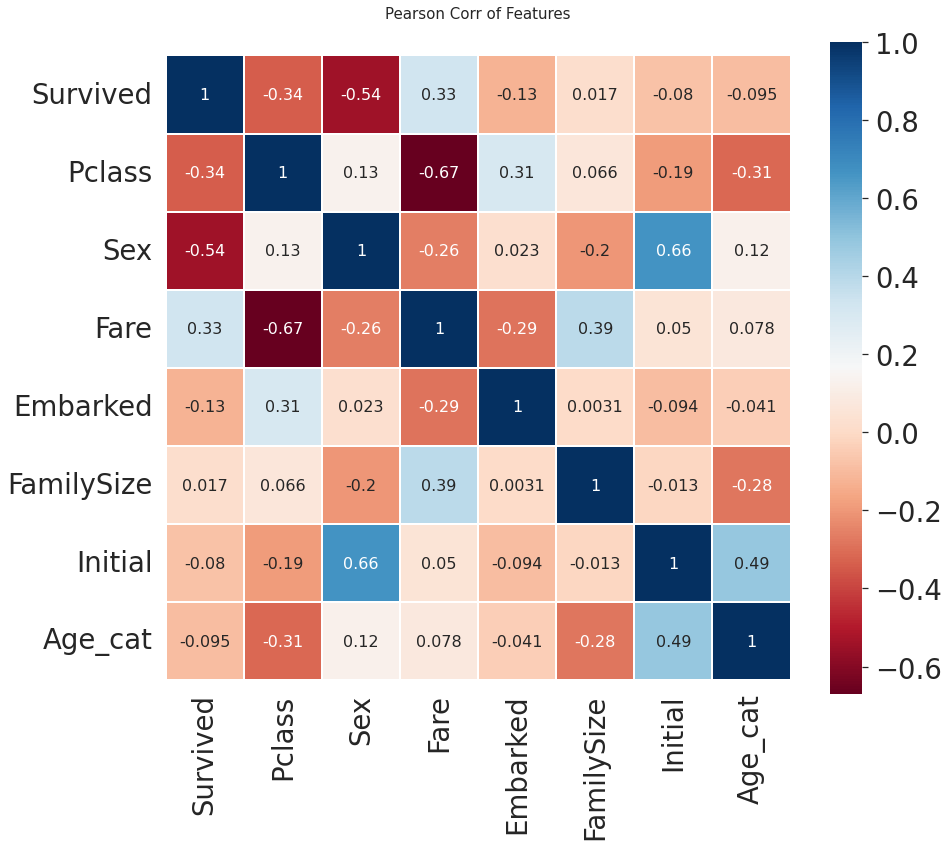

In [55]:
heatmap_data = df_train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize','Initial','Age_cat']]

colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Corr of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size':16})

del heatmap_data

# Pclass 와 Sex가 Survived와 연관성 높아.
# Fare와 Embarked도 Survived와 연관됨
# feature끼리 강한 상관관계 X -> 불필요한 feature 없음 
# 1, -1 정도 나오는 feature는 무의미

### 3.4 One-hot encoding on Initial and Embarked
- preprocessing
- category -> boolean

In [56]:
# pd.get_dummies()
df_train = pd.get_dummies(df_train, columns=['Initial'], prefix='Initial')
df_test = pd.get_dummies(df_test, columns=['Initial'], prefix='Initial')

In [57]:
df_train.head() # Initial_1, 2, 3 생성됨

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat,Initial_1.0,Initial_2.0,Initial_4.0
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,1,2,2,0,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,0,2,3,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,1,2,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,1,2,3,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,1,3,0,0,0


In [58]:
df_train = pd.get_dummies(df_train, columns=['Embarked'], prefix='Embarked')
df_test = pd.get_dummies(df_test, columns=['Embarked'], prefix='Embarked')

In [59]:
df_train.head()
# 종류가 너무 많은 경우 one hot encoding 하면 너무 많은 컬럼 생긴다 -> 다른 방법 존재

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat,Initial_1.0,Initial_2.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,1,0,3,"Braund, Mr. Owen Harris",1,1,0,A/5 21171,1.981001,NaN,2,2,0,0,0,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,0,PC 17599,4.266662,C85,2,3,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,0,0,STON/O2. 3101282,2.070022,NaN,1,2,1,0,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,0,113803,3.972177,C123,2,3,0,1,0,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,0,0,373450,2.085672,NaN,1,3,0,0,0,0,1,0


In [60]:
### 3.5 Drop columns
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [61]:
df_train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_1.0,Initial_2.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,0,3,1,1.981001,2,2,0,0,0,0,1,0
1,1,1,0,4.266662,2,3,0,1,0,1,0,0
2,1,3,0,2.070022,1,2,1,0,0,0,1,0
3,1,1,0,3.972177,2,3,0,1,0,0,1,0
4,0,3,1,2.085672,1,3,0,0,0,0,1,0


In [62]:
df_test.head()

,Pclass,Sex,Fare,FamilySize,Age_cat,Initial_1.0,Initial_2.0,Initial_4.0,Embarked_0,Embarked_1,Embarked_2
0,3,1,2.057860,1,3,0,0,0,0,0,1
1,3,0,1.945910,2,4,0,1,0,0,1,0
2,2,1,2.270836,1,6,0,0,0,0,0,1
3,3,1,2.159003,1,2,0,0,0,0,1,0
4,3,0,2.508582,3,2,0,1,0,0,1,0


## 4. Building ML model and prediction using the trained model
- sklearn
- binary classification
**Random Forest**
- decision tree based
- default setting 으로

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics # 모델 평가
from sklearn.model_selection import train_test_split

### 4.1 Preparation - Split dataset into train, valid, test set

In [64]:
# target label 분리
X_train = df_train.drop('Survived', axis=1).values
target_label = df_train['Survived'].values
X_test = df_test.values

In [65]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

### 4.2 Model generation and prediction

In [66]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [67]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100*metrics.accuracy_score(prediction, y_vld)))

총 268명 중 82.46% 정확도로 생존을 맞춤


### 4.3 Feature Importance
- 이 모델이 어떤 feature의 영향을 많이 받았는지

In [68]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=df_test.columns)

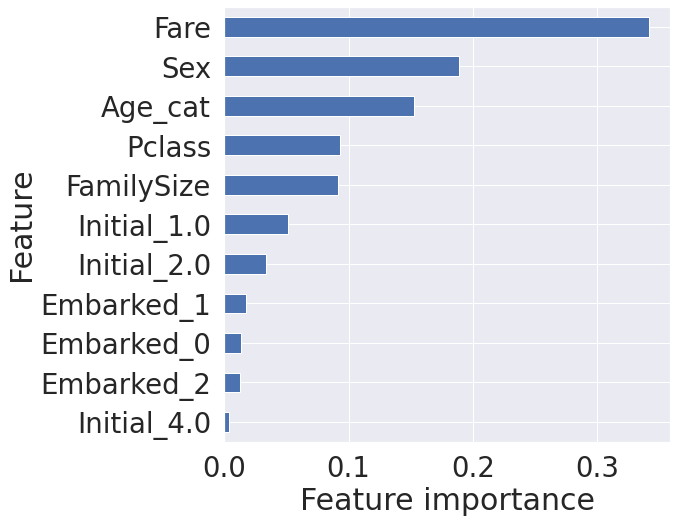

In [69]:
plt.figure(figsize=(8,8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

- 현재 모델에서는 Fare가 중요한 요소로 보이나, 모델마다 상이할 수 있음

### 4.4 Prediction on Test set

In [70]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

In [71]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [72]:
prediction = model.predict(X_test)
submission['Survived'] = prediction
submission.to_csv('./my_first_submission.csv', index=False)